<a href="https://colab.research.google.com/github/GamaLab42/LivroBioprocessos/blob/main/Par%C3%A2metro_de_Henry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import numpy as np
import scipy

from scipy.optimize import fsolve

import time
#import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy import integrate

# Para o modelo de coluna
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sys import argv

import math
from numba import njit

from scipy.optimize import minimize_scalar
from functools import partial

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Constantes

In [ ]:
T         = 298.15            # Temperatura
kb        = 1.3806E-23        # Constante de Boltzmann
epsilon   = 80.0              # Constante dielétrica do meio (-)
epsilon0  = 8.854E-12         # Constante dielétrica do vácuuo (C^2 m-1 J-1)
Na        = 6.022E+23         # Numero do Avogrado
F         = 96.485E+3         # Constante de Faraday (C mol-1)
e         = 1.602176E-19      # Carga elementar do eletron (C)
R         = 8.314             # Gas constant (J/mol/K)

dw01        = 1.70E-11           # Comprimento da camada de água na parede (m)
dw02        = 1.70E-10           # Comprimento da camada de água na parede (m)

# Código Principal


In [ ]:
def G_vdw(L,H):
  dist = L + dw01
  G = - H/12/np.pi/dist/dist
  return G

In [ ]:
def kappa (Conc):

  kappa = np.sqrt(np.power(e,2)*Na*float(2)*Conc*float(1000)/epsilon/epsilon0/kb/T)

  return kappa

In [ ]:
def G_es(L,sigma_s,sigma_p,conc):
  dist = L + dw01
  kappa = np.sqrt(np.power(e,2)*Na*float(2)*conc*float(1000)/epsilon/epsilon0/kb/T)
  den = (sigma_s*sigma_s + sigma_p*sigma_p)*np.exp(-kappa*dist)+2*sigma_s*sigma_p
  G = den/kappa/epsilon/epsilon0/(np.exp(kappa*dist) - np.exp(-kappa*dist))
  return G

In [ ]:
# Ap = 2500 AA = 2.5e-17 m2
# As/V0 = 135.0E+6 m2/m3

Ap = 2.5E-17
fase = 135.0E+6

def Henry (L,sigma_s,sigma_p, H, conc):

  dist = L

  kappa = np.sqrt(np.power(e,2)*Na*float(2)*conc*float(1000)/epsilon/epsilon0/kb/T)

  den = (sigma_s*sigma_s + sigma_p*sigma_p)*np.exp(-kappa*dist)+2*sigma_s*sigma_p
  G_ele = - Ap * den/kappa/epsilon/epsilon0/kb/T/(np.exp(kappa*dist) - np.exp(-kappa*dist))

  G_vdW = Ap * H/12.0/np.pi/dist/dist/kb/T

  return np.exp((G_ele + G_vdW)) - 1

In [ ]:
def G_total(L,sigma_s,sigma_p, H, conc, d_lim):
  dist = L + d_lim

  kappa = np.sqrt(np.power(e,2)*Na*float(2)*conc*float(1000)/epsilon/epsilon0/kb/T)

  den = (sigma_s*sigma_s + sigma_p*sigma_p)*np.exp(-kappa*dist)+2*sigma_s*sigma_p
  G_ele = den/kappa/epsilon/epsilon0/(np.exp(kappa*dist) - np.exp(-kappa*dist))

  G_vdW = - H/12/np.pi/dist/dist

  return G_ele + G_vdW


# Plot - Figura 2

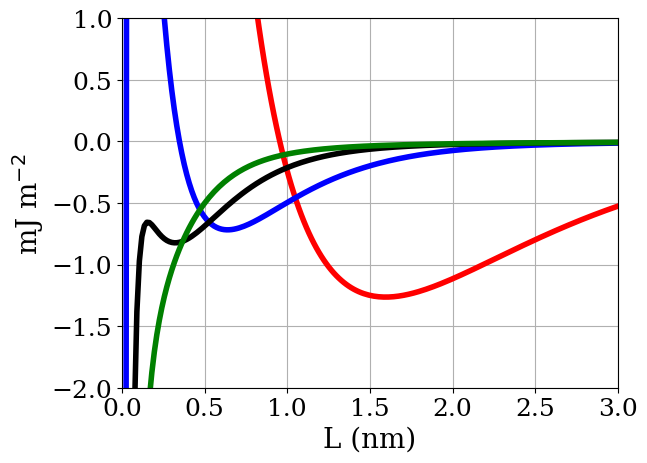

In [ ]:
x = np.linspace(0,3,200)

plt.plot(x, G_total(x*1E-9,0.16,-0.03,3.0E-21,.1, dw01)*1000, color = 'red', linewidth=4.0)     # label = '0.1 M'
plt.plot(x, G_total(x*1E-9,0.16,-0.03,3.0E-21,.5, dw01)*1000, color = 'blue', linewidth=4.0)    # label = '0.5 M'
plt.plot(x, G_total(x*1E-9,0.16,-0.03,3.0E-21,1., dw01)*1000,  color = 'black', linewidth=4.0)  # label = '1.0 M'
plt.plot(x, G_total(x*1E-9,0.16,-0.03,3.0E-21,2., dw01)*1000,  color = 'green', linewidth=4.0)  # label = '2.0 M'

#plt.title('Figura 2A', fontsize=22)
plt.ylabel('mJ m$^{-2}}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('L (nm)', fontsize=20)

plt.grid()
#plt.legend()
plt.ylim(-2,1)
plt.xlim(0,3)
plt.show()

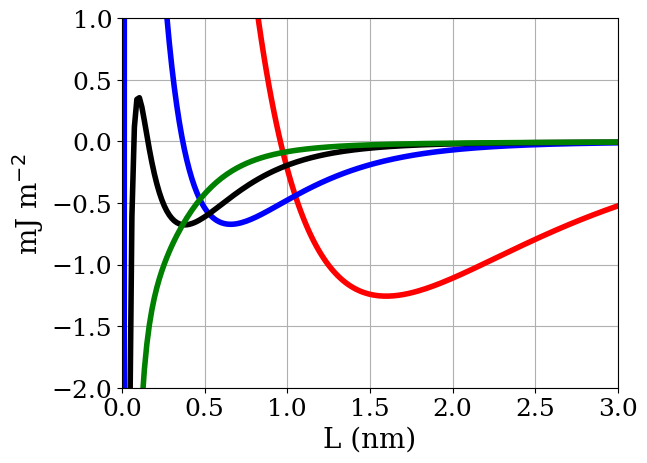

In [ ]:
plt.plot(x, G_total(x*1E-9,0.16,-0.03,2.25E-21,.1, dw01)*1000, color = 'red', linewidth=4.0)    # label = '0.1 M'
plt.plot(x, G_total(x*1E-9,0.16,-0.03,2.25E-21,.5, dw01)*1000, color = 'blue', linewidth=4.0)   # label = '0.5 M'
plt.plot(x, G_total(x*1E-9,0.16,-0.03,2.25E-21,1., dw01)*1000,  color = 'black', linewidth=4.0) # label = '1.0 M'
plt.plot(x, G_total(x*1E-9,0.16,-0.03,2.25E-21,2., dw01)*1000,  color = 'green', linewidth=4.0) # label = '2.0 M'

#plt.title('Figura 2B', fontsize=22)
plt.ylabel('mJ m$^{-2}}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('L (nm)', fontsize=20)

plt.grid()
#plt.legend()
plt.ylim(-2,1)
plt.xlim(0,3)
plt.show()

In [ ]:
G_total(x*1E-9,0.16,-0.03,3.0E-21,1., dw01)*1000

array([-2.14795101e+02, -4.77811800e+01, -1.73316255e+01, -7.75934265e+00,
       -3.94122370e+00, -2.21526014e+00, -1.38238366e+00, -9.71309217e-01,
       -7.72739237e-01, -6.85362592e-01, -6.56990123e-01, -6.59506491e-01,
       -6.77294352e-01, -7.01523635e-01, -7.27181918e-01, -7.51462339e-01,
       -7.72856964e-01, -7.90631867e-01, -8.04515945e-01, -8.14512918e-01,
       -8.20786135e-01, -8.23587301e-01, -8.23212187e-01, -8.19973148e-01,
       -8.14182239e-01, -8.06141073e-01, -7.96134983e-01, -7.84429940e-01,
       -7.71271229e-01, -7.56883236e-01, -7.41469927e-01, -7.25215733e-01,
       -7.08286673e-01, -6.90831588e-01, -6.72983415e-01, -6.54860447e-01,
       -6.36567556e-01, -6.18197358e-01, -5.99831307e-01, -5.81540715e-01,
       -5.63387706e-01, -5.45426093e-01, -5.27702183e-01, -5.10255520e-01,
       -4.93119569e-01, -4.76322332e-01, -4.59886922e-01, -4.43832076e-01,
       -4.28172632e-01, -4.12919956e-01, -3.98082332e-01, -3.83665319e-01,
       -3.69672068e-01, -

In [ ]:
x

array([0.        , 0.01507538, 0.03015075, 0.04522613, 0.06030151,
       0.07537688, 0.09045226, 0.10552764, 0.12060302, 0.13567839,
       0.15075377, 0.16582915, 0.18090452, 0.1959799 , 0.21105528,
       0.22613065, 0.24120603, 0.25628141, 0.27135678, 0.28643216,
       0.30150754, 0.31658291, 0.33165829, 0.34673367, 0.36180905,
       0.37688442, 0.3919598 , 0.40703518, 0.42211055, 0.43718593,
       0.45226131, 0.46733668, 0.48241206, 0.49748744, 0.51256281,
       0.52763819, 0.54271357, 0.55778894, 0.57286432, 0.5879397 ,
       0.60301508, 0.61809045, 0.63316583, 0.64824121, 0.66331658,
       0.67839196, 0.69346734, 0.70854271, 0.72361809, 0.73869347,
       0.75376884, 0.76884422, 0.7839196 , 0.79899497, 0.81407035,
       0.82914573, 0.84422111, 0.85929648, 0.87437186, 0.88944724,
       0.90452261, 0.91959799, 0.93467337, 0.94974874, 0.96482412,
       0.9798995 , 0.99497487, 1.01005025, 1.02512563, 1.04020101,
       1.05527638, 1.07035176, 1.08542714, 1.10050251, 1.11557

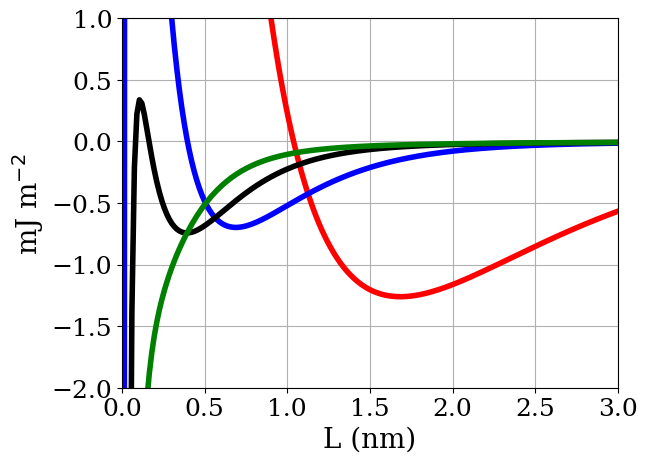

In [ ]:
plt.plot(x, G_total(x*1E-9,0.175,-0.03,3.0E-21,.1, dw01)*1000, color = 'red', linewidth=4.0)    # label = '0.1 M'
plt.plot(x, G_total(x*1E-9,0.175,-0.03,3.0E-21,.5, dw01)*1000, color = 'blue', linewidth=4.0)   # label = '0.5 M'
plt.plot(x, G_total(x*1E-9,0.175,-0.03,3.0E-21,1., dw01)*1000, color = 'black', linewidth=4.0)  # label = '1.0 M'
plt.plot(x, G_total(x*1E-9,0.175,-0.03,3.0E-21,2., dw01)*1000, color = 'green', linewidth=4.0)  # label = '2.0 M'

#plt.title('Figura 2C', fontsize=22)
plt.ylabel('mJ m$^{-2}}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('L (nm)', fontsize=20)

plt.grid()
#plt.legend()
plt.ylim(-2,1)
plt.xlim(0,3)
plt.show()

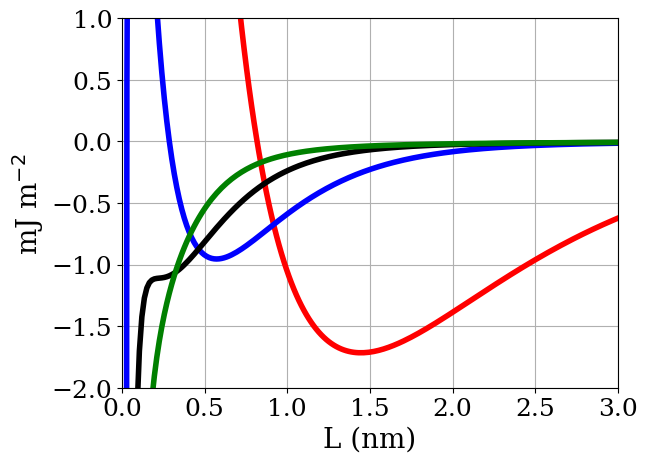

In [ ]:
plt.plot(x, G_total(x*1E-9,0.160,-0.035,3.0E-21,.1, dw01)*1000, color = 'red', linewidth=4.0)   # label = '0.1 M'
plt.plot(x, G_total(x*1E-9,0.160,-0.035,3.0E-21,.5, dw01)*1000, color = 'blue', linewidth=4.0)  # label = '0.5 M'
plt.plot(x, G_total(x*1E-9,0.160,-0.035,3.0E-21,1., dw01)*1000, color = 'black', linewidth=4.0) # label = '1.0 M'
plt.plot(x, G_total(x*1E-9,0.160,-0.035,3.0E-21,2., dw01)*1000, color = 'green', linewidth=4.0) # label = '2.0 M'

#plt.title('Figura 2D', fontsize=22)
plt.ylabel('mJ m$^{-2}}$', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('L (nm)', fontsize=20)

plt.grid()
#plt.legend()
plt.ylim(-2,1)
plt.xlim(0,3)
plt.show()

# Plot - Figura 4

In [ ]:
import warnings

# Função de tratamento do aviso
def handle_warning(message, category, filename, lineno, file=None, line=None):
    global lim
    print("Aviso RuntimeWarning:", message)
    lim = dw02  # Defina lim como dw

# Registrar a função de tratamento de aviso
warnings.showwarning = handle_warning

# Filtrar os avisos do tipo RuntimeWarning para serem tratados como exceções
warnings.simplefilter("error", RuntimeWarning)


In [ ]:
def limite(delta_s, delta_p, Ham, Ist, d_lim):
  try:
    zero = fsolve(G_total, 1.8*dw02, args=(delta_s, delta_p, Ham, Ist, d_lim))
    lim = zero[0]
  except RuntimeWarning:
    lim = dw02
  return lim

In [ ]:
Is  = []
K_0 = []
K_1 = []
K_3 = []
K_6 = []
K_10 = []

conc = 8
conc_min = 0.05
passo = 400

delta = (conc-conc_min)/passo

delta_s = 0.16
delta_p = -0.0224

for i in range(0,passo):
  Is.append(1/np.sqrt(delta*i+conc_min))

  Hamaker = 1.0E-21

  result = integrate.quad(lambda x: Henry(x,delta_s,delta_p,Hamaker,(delta*i+conc_min)),limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01), 10.0E-9)
  K_1.append(np.log(fase*result[0]))

  Hamaker = 3.0E-21

  result = integrate.quad(lambda x: Henry(x,delta_s,delta_p,Hamaker,(delta*i+conc_min)),limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01), 10.0E-9)
  K_3.append(np.log(fase*result[0]))

  Hamaker = 6.0E-21

  result = integrate.quad(lambda x: Henry(x,delta_s,delta_p,Hamaker,(delta*i+conc_min)),limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01), 10.0E-9)
  K_6.append(np.log(fase*result[0]))

  Hamaker = 10.0E-21

  result = integrate.quad(lambda x: Henry(x,delta_s,delta_p,Hamaker,(delta*i+conc_min)),limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01), 10.0E-9)
  K_10.append(np.log(fase*result[0]))

  Hamaker = 0.0E-21

  result = integrate.quad(lambda x: Henry(x,delta_s,delta_p,Hamaker,(delta*i+conc_min)),limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01), 10.0E-9)
  K_0.append(np.log(fase*result[0]))

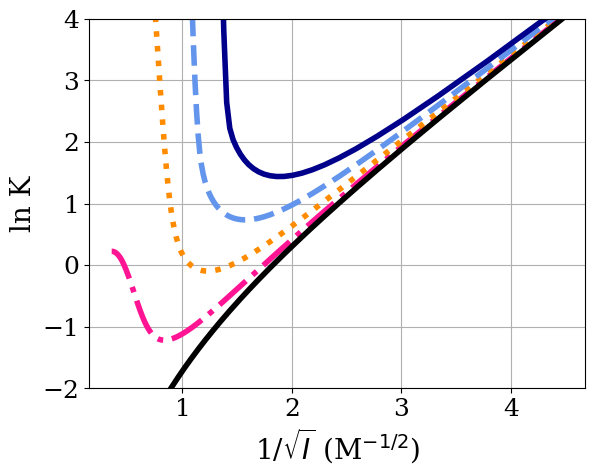

In [ ]:
plt.plot(Is, K_1, color = 'deeppink',  linewidth=4.0,  label = '1E-21',  linestyle='-.')
plt.plot(Is, K_3, color = 'darkorange',   linewidth=4.0,  label = '3E-21',  linestyle=':')
plt.plot(Is, K_6, color = 'cornflowerblue',    linewidth=4.0,  label = '6E-21',  linestyle='--')
plt.plot(Is, K_10, color = 'darkblue', linewidth=4.0,  label = '10E-21', linestyle='-')
plt.plot(Is, K_0, color = 'black', linewidth=4.0,  label = '0E-21',  linestyle='-')

#plt.title('Figura 4', fontsize=22)
plt.ylabel('ln K', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('1/$\sqrt{I}$ (M$^{-1/2}$)', fontsize=20)

plt.grid()
#plt.legend()
plt.ylim(-2,4)
plt.show()

In [ ]:
Is  = []
L_0 = []
L_1 = []
L_3 = []
L_6 = []
L_10 = []

conc = 10
conc_min = 0.05
passo = 200

delta = (conc-conc_min)/passo

delta_s = 0.16
delta_p = -0.0224

for i in range(0,passo):
  Is.append(1/np.sqrt(delta*i+conc_min))

  Hamaker = 1.0E-21

  result = limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01)
  L_1.append(result*1E+9)

  Hamaker = 3.0E-21

  result = limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01)
  L_3.append(result*1E+9)

  Hamaker = 6.0E-21

  result = limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01)
  L_6.append(result*1E+9)

  Hamaker = 10.0E-21

  result = limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01)
  L_10.append(result*1E+9)

  Hamaker = 0.0E-21

  result = limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dw01)
  L_0.append(result*1E+9)

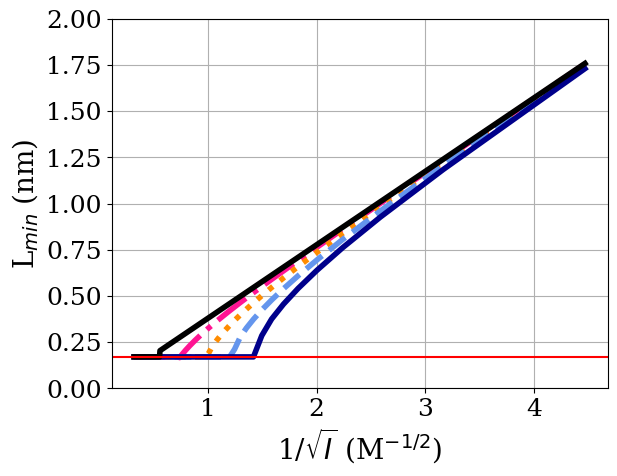

In [ ]:
plt.plot(Is, L_1, color = 'deeppink', linewidth=4.0, label = '1E-21', linestyle='-.')
plt.plot(Is, L_3, color = 'darkorange', linewidth=4.0, label = '3E-21', linestyle=':')
plt.plot(Is, L_6, color = 'cornflowerblue', linewidth=4.0, label = '6E-21', linestyle='--')
plt.plot(Is, L_10, color = 'darkblue', linewidth=4.0, label = '10E-21', linestyle='-')
plt.plot(Is, L_0, color = 'black', linewidth=4.0, label = '0E-21', linestyle='-')

plt.axhline(y = 0.17, color = 'r', linestyle = '-')

plt.ylabel('L$_{min}$ (nm)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('1/$\sqrt{I}$ (M$^{-1/2}$)', fontsize=20)

plt.grid()
#plt.legend()
plt.ylim(0,2)

plt.show()

# Plot - Figura 6 - Lysozyme


In [ ]:
dwp = 0.16E-9

In [ ]:
def Henry2(L,sigma_s,sigma_p, H, conc, Ap):

  dist = L

  kappa = np.sqrt(np.power(e,2)*Na*float(2)*conc*float(1000)/epsilon/epsilon0/kb/T)

  den = (sigma_s*sigma_s + sigma_p*sigma_p)*np.exp(-kappa*dist)+2*sigma_s*sigma_p
  G_ele = - Ap * den/kappa/epsilon/epsilon0/kb/T/(np.exp(kappa*dist) - np.exp(-kappa*dist))

  G_vdW = Ap * H/12.0/np.pi/dist/dist/kb/T

  return np.exp((G_ele + G_vdW)) - 1

In [ ]:
import warnings

# Função de tratamento do aviso
def handle_warning(message, category, filename, lineno, file=None, line=None):
    global lim
    print("Aviso RuntimeWarning:", message)
    lim = dwp  # Defina lim como dw

# Registrar a função de tratamento de aviso
warnings.showwarning = handle_warning

# Filtrar os avisos do tipo RuntimeWarning para serem tratados como exceções
warnings.simplefilter("error", RuntimeWarning)

In [ ]:
def limite(delta_s, delta_p, Ham, Ist, d_lim, Ap):
  try:
    zero = fsolve(G_total, 1.9*dw02, args=(delta_s, delta_p, Ham, Ist, dw01))
    lim = zero[0]
  except RuntimeWarning:
    lim = d_lim
  return lim

In [ ]:
Is_l  = []
K_lys = []

conc = 5
conc_min = 0.05
passo = 100

delta = (conc-conc_min)/passo

delta_s = 0.050
delta_p = -0.220
Ap      = 4.410E-17/2.0
fase    = 3.40E+6

for i in range(0,passo):
  Is_l.append(1/np.sqrt(delta*i+conc_min))

  Hamaker = 1.550E-21

  result = integrate.quad(lambda x: Henry2(x,delta_s,delta_p,Hamaker,(delta*i+conc_min), Ap),limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dwp, Ap), 10.0E-9)
  K_lys.append(np.log(fase*result[0]))


In [ ]:
Exp_lys = [0.8124798802171069,0.06930189032378875,-0.38015347183230386,-0.6654164327157024,-0.6829197080291967,-0.5020026202507952,-0.49352798053527946,-0.27770915216170655,
           -0.010144113793748577, 0.34379936365337826, 0.8444768856447693, 1.2071046228710465, 1.638817143926633, 2.035852517312372, 2.7266254912970247]
Ion_lys = [0.5170784203630919, 0.5742092457420924, 0.635354669661239, 0.6833239752947782, 0.7483342691371889, 0.8954519932622123, 0.9431031255848774, 0.99052966498222,
           1.0638966872543514, 1.141502900991952, 1.2579449747332958, 1.322543514879281, 1.3957327344188657, 1.5036215609208308, 1.6111922141119221]

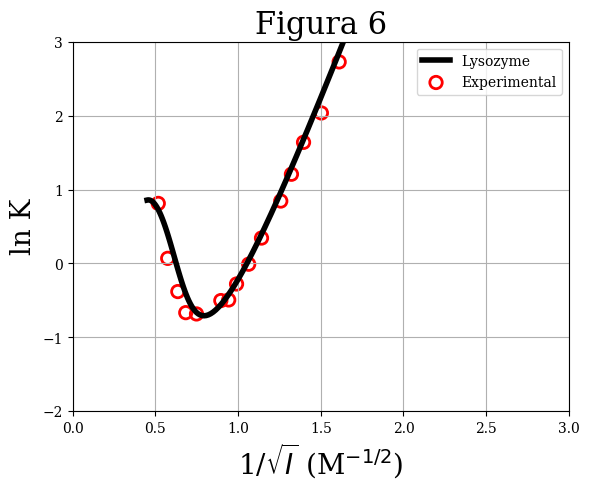

In [ ]:
plt.plot(Is_l, K_lys, color = 'black',  label = 'Lysozyme',linewidth=4.0)
plt.scatter(Ion_lys, Exp_lys, label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='r')


plt.title('Figura 6', fontsize=22)
plt.ylabel('ln K', fontsize=20)
plt.xlabel('1/$\sqrt{I}$ (M$^{-1/2}$)', fontsize=20)

plt.grid()
plt.legend()
plt.ylim(-2,3)
plt.xlim(0,3.0)

plt.show()

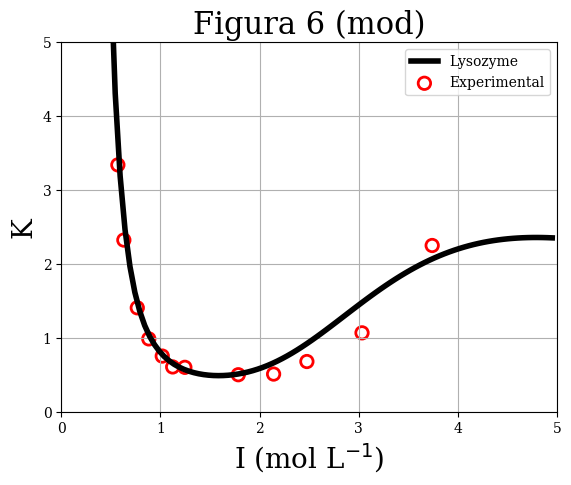

In [ ]:
plt.plot(1/np.square(Is_l), np.exp(K_lys), color = 'black',  label = 'Lysozyme',linewidth=4.0)
plt.scatter(1/np.square(Ion_lys), np.exp(Exp_lys), label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='r')


plt.title('Figura 6 (mod)', fontsize=22)
plt.ylabel('K', fontsize=20)
plt.xlabel('I (mol L$^{-1}$)', fontsize=20)

plt.grid()
plt.legend()
plt.ylim(0,5)
plt.xlim(0,5.0)

plt.show()

In [ ]:
Is  = []
L_lys = []

conc = 5
conc_min = 0.5
passo = 100

delta = (conc-conc_min)/passo

for i in range(0,passo):
  Is.append(1/np.sqrt(delta*i+conc_min))

  result = limite(delta_s, delta_p, Hamaker, (delta*i+conc_min), dwp, Ap)
  L_lys.append(result*1E+9)

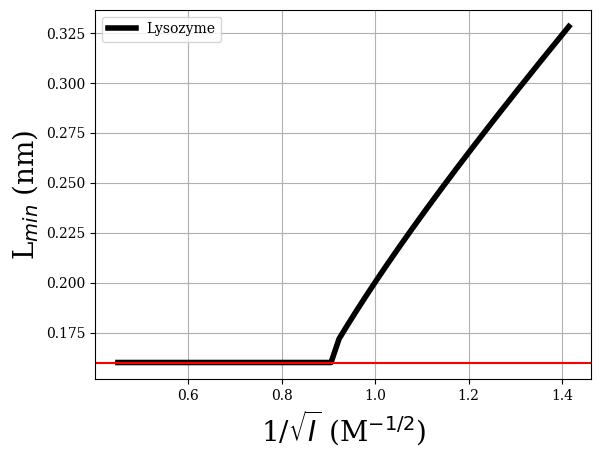

In [ ]:
plt.plot(Is, L_lys, color = 'black',  label = 'Lysozyme', linewidth= 4.0)

plt.ylabel('L$_{min}$ (nm)', fontsize=20)
plt.xlabel('1/$\sqrt{I}$ (M$^{-1/2}$)', fontsize=20)

plt.axhline(y = dwp*1E+9, color = 'r', linestyle = '-')

plt.grid()
plt.legend()
#plt.ylim(-2,4)
plt.show()



# Plot - Figura 6 - All proteins


In [ ]:
dwp = 0.12E-9

In [ ]:
def Henry2(L,sigma_s,sigma_p, H, conc, Ap):

  dist = L

  kappa = np.sqrt(np.power(e,2)*Na*float(2)*conc*float(1000)/epsilon/epsilon0/kb/T)

  den = (sigma_s*sigma_s + sigma_p*sigma_p)*np.exp(-kappa*dist)+2*sigma_s*sigma_p
  G_ele = - Ap * den/kappa/epsilon/epsilon0/kb/T/(np.exp(kappa*dist) - np.exp(-kappa*dist))

  G_vdW = Ap * H/12.0/np.pi/dist/dist/kb/T

  return np.exp((G_ele + G_vdW)) - 1

In [ ]:
import warnings

# Função de tratamento do aviso
def handle_warning(message, category, filename, lineno, file=None, line=None):
    global lim
    print("Aviso RuntimeWarning:", message)
    lim = dwp  # Defina lim como dw

# Registrar a função de tratamento de aviso
warnings.showwarning = handle_warning

# Filtrar os avisos do tipo RuntimeWarning para serem tratados como exceções
warnings.simplefilter("error", RuntimeWarning)

In [ ]:
def limite(delta_s, delta_p, Ham, Ist, d_lim, Ap):
  try:
    zero = fsolve(G_total, 1.9*dw02, args=(delta_s, delta_p, Ham, Ist, dw01))
    lim = zero[0]
  except RuntimeWarning:
    lim = d_lim
  return lim

In [ ]:
Is  = []
K_alpha = []
K_cyto  = []
K_ribo  = []

conc = 8
conc_min = 0.05
passo = 100

delta = (conc-conc_min)/passo

delta_p = -0.220
fase    = 3.40E+6

for i in range(0,passo):
  Is.append(1/np.sqrt(delta*i+conc_min))

  Hamaker = 2.110E-21

  result = integrate.quad(lambda x: Henry2(x,0.0430,delta_p,Hamaker,(delta*i+conc_min), 4.834E-17/2.0),limite(0.0430, delta_p, Hamaker, (delta*i+conc_min), dwp, 4.834E-17/2.0), 10.0E-9)
  K_alpha.append(np.log(fase*result[0]))

  Hamaker = 0.940E-21

  result = integrate.quad(lambda x: Henry2(x,0.0430,delta_p,Hamaker,(delta*i+conc_min), 4.410E-17/2.0),limite(0.0430, delta_p, Hamaker, (delta*i+conc_min), dwp, 4.410E-17/2.0), 10.0E-9)
  K_cyto.append(np.log(fase*result[0]))

  Hamaker = 1.240E-21

  result = integrate.quad(lambda x: Henry2(x,0.0387,delta_p,Hamaker,(delta*i+conc_min), 4.160E-17/2.0),limite(0.0387, delta_p, Hamaker, (delta*i+conc_min), dwp, 4.160E-17/2.0), 10.0E-9)
  K_ribo.append(np.log(fase*result[0]))


In [ ]:
Exp_alpha = [1.6183368869936028, 0.6972281449893383, 0.006396588486140331, -0.4882729211087429, -0.7270788912579969, -0.7356076759061843, -0.684434968017058, -0.684434968017058,
           -0.5906183368869944, -0.5223880597014929, -0.11300639658848688, 0.1343283582089545, 0.4157782515991464, 0.8081023454157776, 1.2601279317697225, 1.8571428571428565]
Ion_alpha = [0.5746140651801028, 0.6389365351629503, 0.6861063464837049, 0.7204116638078901, 0.8104631217838765, 0.9048027444253861, 0.9562607204116638, 0.9948542024013722,
           1.0677530017152659, 1.1449399656946826, 1.260720411663808, 1.3336192109777014, 1.402229845626072, 1.5008576329331045, 1.6123499142367066, 1.7710120068610633]

Exp_cito = [-0.10447761194029903, -0.6247334754797449, -1.0341151385927514, -1.3837953091684438, -1.068230277185502, -0.5991471215351822, -0.06183368869936068, 0.5522388059701484,
           1.2857142857142851, 2.121535181236673]
Ion_cito = [0.3644939965694683, 0.38593481989708395, 0.40308747855917665, 0.43310463121783865, 1.316466552315609, 1.3936535162950257, 1.5008576329331045, 1.6037735849056605,
           1.7753001715265866, 1.9339622641509433]

Exp_ribo = [0.6972281449893383, -0.07036247334754897, -0.889125799573562, -1.1108742004264398, -0.8976545842217485, -0.10447761194029903, 0.7995735607675902, 2.4626865671641784]
Ion_ribo = [0.3987993138936535, 0.43310463121783865, 0.48027444253859347, 1.6037735849056605, 1.7710120068610633, 1.9425385934819894, 2.2255574614065177, 2.645797598627787]

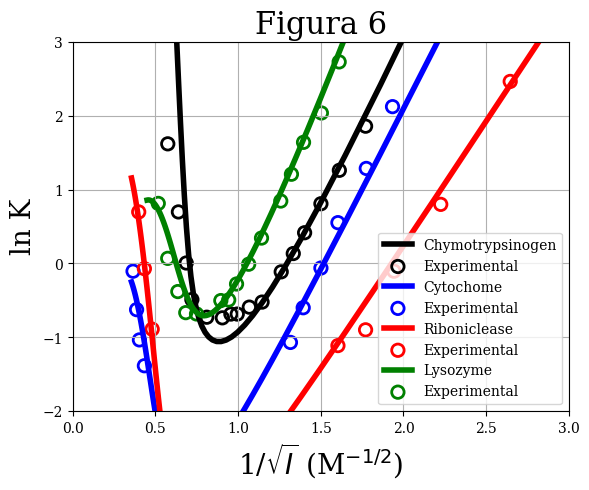

In [ ]:
plt.plot(Is, K_alpha, color = 'black',  label = 'Chymotrypsinogen',linewidth=4.0)
plt.scatter(Ion_alpha, Exp_alpha, label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='black')

plt.plot(Is, K_cyto, color = 'blue',  label = 'Cytochome',linewidth=4.0)
plt.scatter(Ion_cito, Exp_cito, label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='b')

plt.plot(Is, K_ribo, color = 'red',  label = 'Riboniclease',linewidth=4.0)
plt.scatter(Ion_ribo, Exp_ribo, label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='r')

plt.plot(Is_l, K_lys, color = 'green',  label = 'Lysozyme',linewidth=4.0)
plt.scatter(Ion_lys, Exp_lys, label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='g')


plt.title('Figura 6', fontsize=22)
plt.ylabel('ln K', fontsize=20)
plt.xlabel('1/$\sqrt{I}$ (M$^{-1/2}$)', fontsize=20)

plt.grid()
plt.legend()
plt.ylim(-2,3)
plt.xlim(0,3.0)

plt.show()

In [ ]:
Is_lim  = []
L_alpha = []
L_cito = []
L_ribo = []

conc = 5
conc_min = 0.5
passo = 100

delta = (conc-conc_min)/passo

for i in range(0,passo):
  Is_lim.append(1/np.sqrt(delta*i+conc_min))

  result = limite(-0.220, 0.0430, 2.110E-21, (delta*i+conc_min), dwp, 4.834E-17/2.0)
  L_alpha.append(result*1E+9)

  result = limite(-0.220, 0.0430, 0.940E-21, (delta*i+conc_min), dwp, 4.410E-17/2.0)
  L_cito.append(result*1E+9)

  result = limite(-0.220, 0.0387, 1.240E-21, (delta*i+conc_min), dwp, 4.160E-17/2.0)
  L_ribo.append(result*1E+9)

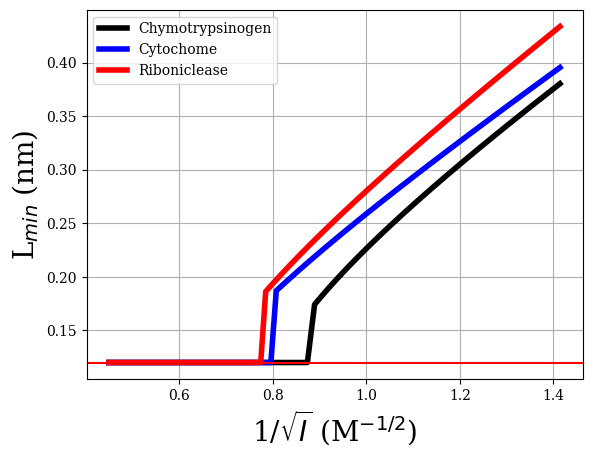

In [ ]:
#plt.plot(Is,     L_lys,   color = 'green',  label = 'Lysozyme',         linewidth= 4.0)
plt.plot(Is_lim, L_alpha, color = 'black',  label = 'Chymotrypsinogen', linewidth= 4.0)
plt.plot(Is_lim, L_cito,  color = 'blue',   label = 'Cytochome',        linewidth= 4.0)
plt.plot(Is_lim, L_ribo,  color = 'red',    label = 'Riboniclease',     linewidth= 4.0)


plt.ylabel('L$_{min}$ (nm)', fontsize=20)
plt.xlabel('1/$\sqrt{I}$ (M$^{-1/2}$)', fontsize=20)

plt.axhline(y = dwp*1E+9, color = 'r', linestyle = '-')

plt.grid()
plt.legend()
#plt.ylim(-2,4)
plt.show()



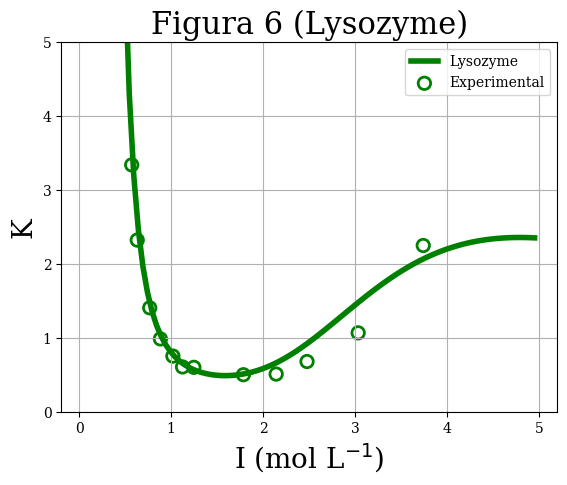

In [ ]:
plt.plot(1/np.square(Is_l), np.exp(K_lys), color = 'green',  label = 'Lysozyme',linewidth=4.0)
plt.scatter(1/np.square(Ion_lys), np.exp(Exp_lys), label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='g')

plt.title('Figura 6 (Lysozyme)', fontsize=22)
plt.ylabel('K', fontsize=20)
plt.xlabel('I (mol L$^{-1}$)', fontsize=20)

plt.grid()
plt.legend()
plt.ylim(0,5)
#plt.xlim(0,5.0)

plt.show()

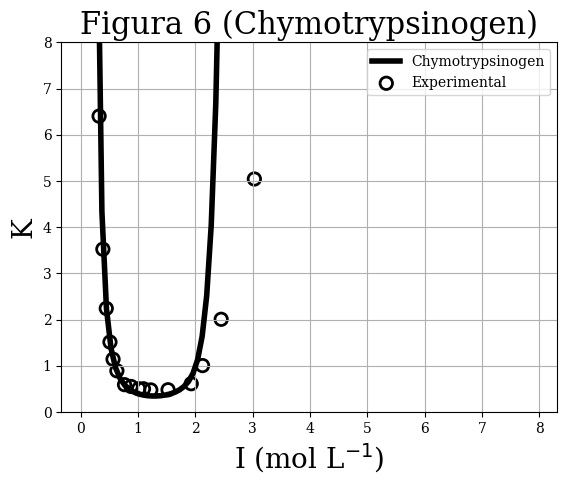

In [ ]:
plt.plot(1/np.square(Is), np.exp(K_alpha), color = 'black',  label = 'Chymotrypsinogen',linewidth=4.0)
plt.scatter(1/np.square(Ion_alpha), np.exp(Exp_alpha), label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='black')

plt.title('Figura 6 (Chymotrypsinogen)', fontsize=22)
plt.ylabel('K', fontsize=20)
plt.xlabel('I (mol L$^{-1}$)', fontsize=20)

plt.grid()
plt.legend()
plt.ylim(0,8)
#plt.xlim(0,5.0)

plt.show()

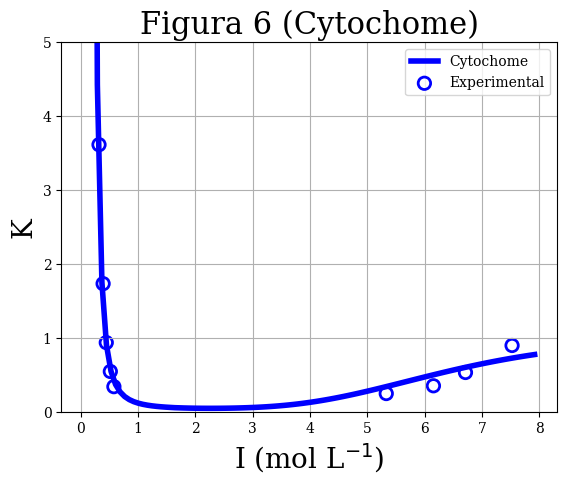

In [ ]:
plt.plot(1/np.square(Is), np.exp(K_cyto), color = 'blue',  label = 'Cytochome',linewidth=4.0)
plt.scatter(1/np.square(Ion_cito), np.exp(Exp_cito), label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='b')

plt.title('Figura 6 (Cytochome)', fontsize=22)
plt.ylabel('K', fontsize=20)
plt.xlabel('I (mol L$^{-1}$)', fontsize=20)

plt.grid()
plt.legend()
plt.ylim(0,5)
#plt.xlim(0,5.0)

plt.show()

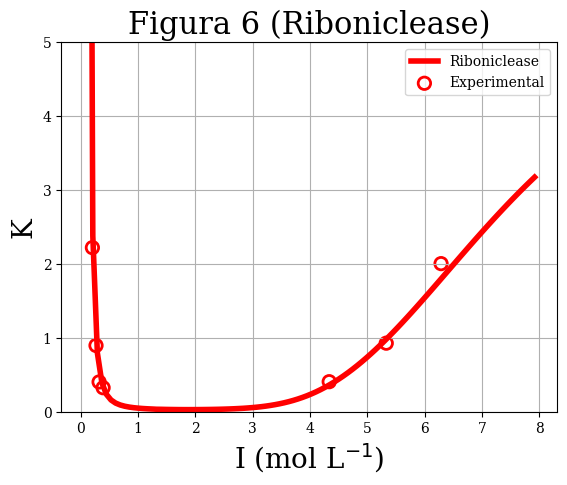

In [ ]:

plt.plot(1/np.square(Is), np.exp(K_ribo), color = 'red',  label = 'Riboniclease',linewidth=4.0)
plt.scatter(1/np.square(Ion_ribo), np.exp(Exp_ribo), label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='r')

plt.title('Figura 6 (Riboniclease)', fontsize=22)
plt.ylabel('K', fontsize=20)
plt.xlabel('I (mol L$^{-1}$)', fontsize=20)

plt.grid()
plt.legend()
plt.ylim(0,5)
#plt.xlim(0,5.0)

plt.show()

(0.0, 5.0)

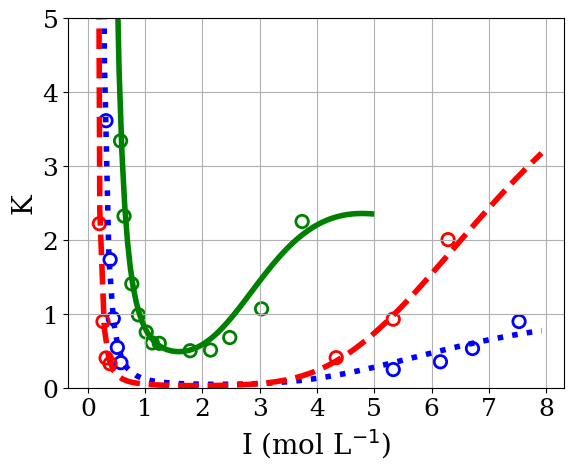

In [ ]:
plt.plot(1/np.square(Is_l), np.exp(K_lys), color = 'green',  label = 'Lysozyme',linewidth=4.0, linestyle='-')
plt.scatter(1/np.square(Ion_lys), np.exp(Exp_lys), label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='g')

plt.plot(1/np.square(Is), np.exp(K_cyto), color = 'blue',  label = 'Cytochome',linewidth=4.0, linestyle=':')
plt.scatter(1/np.square(Ion_cito), np.exp(Exp_cito), label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='b')

plt.plot(1/np.square(Is), np.exp(K_ribo), color = 'red',  label = 'Riboniclease',linewidth=4.0, linestyle='--')
plt.scatter(1/np.square(Ion_ribo), np.exp(Exp_ribo), label = 'Experimental',linewidth=2.0, marker='o', facecolors='none',s=80,edgecolors='r')

#plt.title('Figura 6', fontsize=22)
plt.ylabel('K', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('I (mol L$^{-1}$)', fontsize=20)

plt.grid()
#plt.legend()
plt.ylim(0,5)
#plt.xlim(0,5.0)